We consider a database containing six characterizing measurements for batches of plastic pellets.The outcome when using this material, either ”Poor” or ”Adequate”, is also provided.

The goal is to classify material lots according to quality, starting from the measurements.

- Each row of the matrix A refers to a sample (i.e. to a material lot);
- Each column corresponds to a feature.

The vector labels contains the material quality of the sample with corresponding index.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe = pd.read_csv("https://openmv.net/file/raw-material-characterization.csv")
data = dataframe.to_numpy()
A = data[:, 2:].astype(np.float64)
labels = data[:, 1]
groups = ("Adequate", "Poor")

1. How many samples are there in the dataset? How many poor quality and adequate quality samples are there?


In [3]:
print(A.shape)

(24, 6)


There are 24 samples, each has 6 features.


In [4]:
adequate_samples = A[labels == groups[0]]
poor_samples = A[labels == groups[1]]

print(adequate_samples.shape)
print(poor_samples.shape)

(17, 6)
(7, 6)


There are 17 samples of adequate quality samples, and 7 of poor quality samples.


2. By exploiting SVD decomposition, perform PCA on the provided data. Then plot the trend of the singular values in logarithmic scale.


In [5]:
# A = A.T
print(A.shape)
A_mean = np.mean(A, axis=0)
print(A_mean.shape)
A_bar = A - A_mean[np.newaxis, :]
print(A_bar.shape)

(24, 6)
(6,)
(24, 6)


(24, 6)
(6, 6)


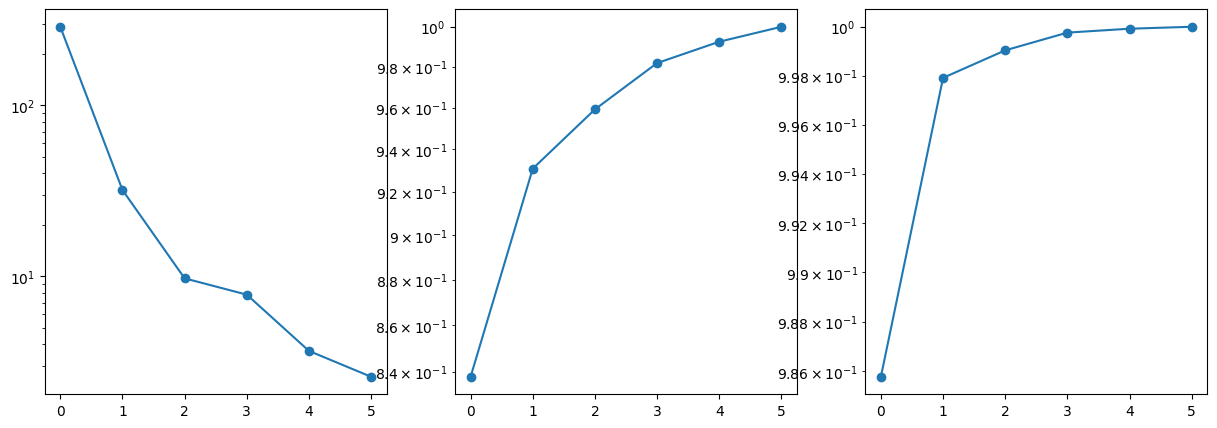

In [6]:
# SVD decomposition on matrix A to perform PCA
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)
print(U.shape)
print(VT.shape)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].semilogy(s, "o-")
axs[1].semilogy(np.cumsum(s) / np.sum(s), "o-")
axs[2].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")

3. Compute a matrix containing the principal components associated with the
   dataset.


In [16]:
# Matrix containing the principal components associated with the dataset
PHI = U @ np.diag(s)
print(PHI.shape)

(24, 6)


In [23]:
PHI = A_bar @ VT.T
print(PHI.shape)

(24, 6)


In [21]:
PHI = VT @ A_bar.T
print(PHI.shape)

(6, 24)


4. Generate a scatterplot of the first two principal components of the dataset, grouped by label.


## PLOT FOR $p \times n$ matrix

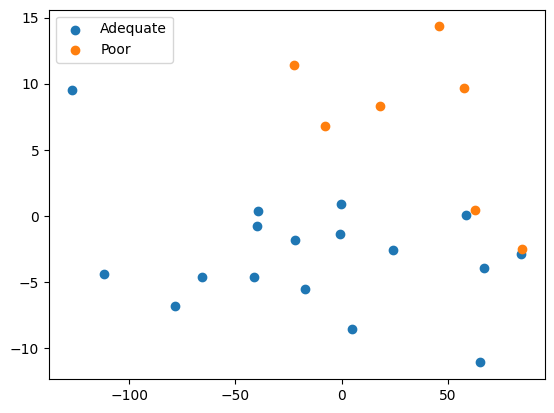

In [22]:
plt.scatter(PHI[0, labels == groups[0]], PHI[1, labels == groups[0]], label="Adequate")
plt.scatter(PHI[0, labels == groups[1]], PHI[1, labels == groups[1]], label="Poor")

plt.legend()

## PLOT FOR $n \times p$ matrix

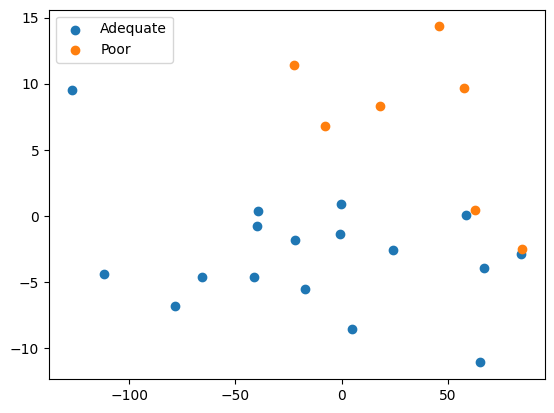

In [24]:
plt.scatter(PHI[labels == groups[0], 0], PHI[labels == groups[0], 1], label="Adequate")
plt.scatter(PHI[labels == groups[1], 0], PHI[labels == groups[1], 1], label="Poor")

plt.legend()

5. Propose a simple classifier to discriminate among poor and adequate quality materials, based on the second principal component. Then compute the accuracy of the classifier (i.e. the fraction of correctly classified samples).


A simple calssifier is given by the line $y = -4$, since it's based on the second principal component.


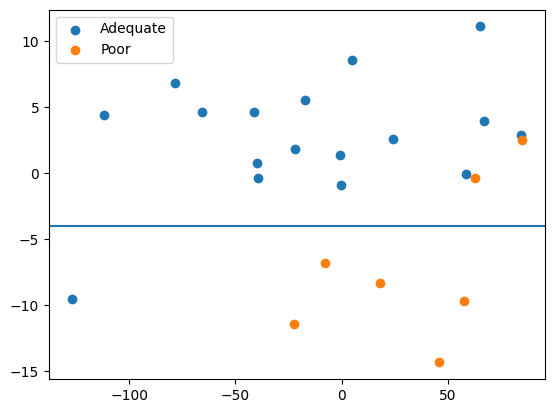

In [ ]:
plt.scatter(PHI[0, labels == groups[0]], PHI[1, labels == groups[0]], label="Adequate")
plt.scatter(PHI[0, labels == groups[1]], PHI[1, labels == groups[1]], label="Poor")
plt.axhline(-4)

plt.legend()

In [ ]:
predicted_labels = np.empty(labels.shape).astype(np.str_)

predicted_labels[PHI[1, :] > -4] = "Adequate"
predicted_labels[PHI[1, :] <= -4] = "Poor"

true_adequate = np.sum(
    np.logical_and(predicted_labels == "Adequate", labels == "Adequate")
)
false_adequate = np.sum(
    np.logical_and(predicted_labels == "Adequate", labels == "Poor")
)
true_poor = np.sum(np.logical_and(predicted_labels == "Poor", labels == "Poor"))
false_poor = np.sum(np.logical_and(predicted_labels == "Poor", labels == "Adequate"))

accuracy = (true_poor + true_adequate) / len(labels) * 100
print(accuracy)

87.5
